##Jupyter Notebook for Data Analysis, Data Cleaning, Data Presentation 

### How has the cryptocurrency market performed versus semiconductor industry during COVID 19?

In [41]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import panel as pn
import plotly.express as px

import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
#Use one new Python library that hasn't been covered in class. (Yfinance is yahoo finance)
import yfinance as yf

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
btc= yf.Ticker("BTC-USD")
btc

yfinance.Ticker object <BTC-USD>

In [5]:
btc_historical_precovid = btc.history(start="2018-03-01", end="2020-03-01")
btc_historical_precovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,10385.000000,11052.299805,10352.700195,10951.000000,7317279744,0,0
2018-03-02,10977.400391,11189.000000,10850.099609,11086.400391,7620590080,0,0
2018-03-03,11101.900391,11528.200195,11002.400391,11489.700195,6690570240,0,0
2018-03-04,11497.400391,11512.599609,11136.099609,11512.599609,6084149760,0,0
2018-03-05,11532.400391,11704.099609,11443.900391,11573.299805,6468539904,0,0


In [6]:
btc_historical_precovid.drop(btc_historical_precovid.columns.difference(['Close']), 1, inplace=True)
btc_historical_precovid.head()

,Close
Date,
2018-03-01,10951.000000
2018-03-02,11086.400391
2018-03-03,11489.700195
2018-03-04,11512.599609
2018-03-05,11573.299805


In [7]:
#Change close to specific column name 
btc_historical_precovid = btc_historical_precovid.rename(columns={"Close": "BTC"})
btc_historical_precovid.head()

,BTC
Date,
2018-03-01,10951.000000
2018-03-02,11086.400391
2018-03-03,11489.700195
2018-03-04,11512.599609
2018-03-05,11573.299805


In [8]:
eth= yf.Ticker("ETH-USD")
eth


yfinance.Ticker object <ETH-USD>

In [9]:
eth_historical_precovid = eth.history(start="2018-03-01", end="2020-03-01")
eth_historical_precovid

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,856.012024,880.302002,851.919983,872.200012,1868519936,0,0
2018-03-02,871.763977,876.377991,852.421997,856.853027,1894419968,0,0
2018-03-03,856.710999,868.453979,855.206970,857.224976,1699369984,0,0
2018-03-04,856.185974,867.950012,840.280029,866.677979,1697939968,0,0
2018-03-05,866.846008,869.919983,853.520020,853.684021,1898489984,0,0
...,...,...,...,...,...,...,...
2020-02-26,247.740204,249.649704,221.266556,225.680267,26235617201,0,0
2020-02-27,225.687042,237.228928,212.664520,226.753387,25645522790,0,0
2020-02-28,226.987610,234.208939,216.346207,226.760498,22563530559,0,0


In [10]:
eth_historical_precovid.drop(eth_historical_precovid.columns.difference(['Close']), 1, inplace=True)
eth_historical_precovid.head()

,Close
Date,
2018-03-01,872.200012
2018-03-02,856.853027
2018-03-03,857.224976
2018-03-04,866.677979
2018-03-05,853.684021


In [11]:
#Change close to specific column name 
eth_historical_precovid = eth_historical_precovid.rename(columns={"Close": "ETH"})
eth_historical_precovid.head()

,ETH
Date,
2018-03-01,872.200012
2018-03-02,856.853027
2018-03-03,857.224976
2018-03-04,866.677979
2018-03-05,853.684021


In [12]:
print(type(eth_historical_precovid))

<class 'pandas.core.frame.DataFrame'>


In [13]:
ltc= yf.Ticker("LTC-USD")
ltc

ltc_historical_precovid = ltc.history(start="2018-03-01", end="2020-03-01")
ltc_historical_precovid

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,203.119003,214.697998,201.542007,209.750000,678542016,0,0
2018-03-02,209.554993,213.128998,204.880005,212.556000,627142016,0,0
2018-03-03,213.837997,217.763000,209.537003,210.643005,681865984,0,0
2018-03-04,210.235992,214.119995,205.363998,213.798996,574675008,0,0
2018-03-05,213.740005,215.977997,209.248993,211.175003,594828992,0,0
...,...,...,...,...,...,...,...
2020-02-26,71.180382,71.864975,58.579491,61.014309,6518313483,0,0
2020-02-27,61.027927,64.623657,57.804031,61.507885,5649302854,0,0
2020-02-28,61.437935,63.171490,57.840664,59.763958,5266399749,0,0


In [14]:
ltc_historical_precovid.drop(ltc_historical_precovid.columns.difference(['Close']), 1, inplace=True)
ltc_historical_precovid.head()

,Close
Date,
2018-03-01,209.750000
2018-03-02,212.556000
2018-03-03,210.643005
2018-03-04,213.798996
2018-03-05,211.175003


In [15]:
#Change close to specific column name 
ltc_historical_precovid = ltc_historical_precovid.rename(columns={"Close": "LTC"})
ltc_historical_precovid.head()

,LTC
Date,
2018-03-01,209.750000
2018-03-02,212.556000
2018-03-03,210.643005
2018-03-04,213.798996
2018-03-05,211.175003


In [16]:
#data cleaning 

#1) check for null values 
# Retrieve DataFrame data types
btc_historical_precovid.dtypes

BTC    float64
dtype: object

In [17]:
# Check for null values BTC
btc_historical_precovid.isnull().sum()

BTC    0
dtype: int64

In [18]:
# Check for null values ETH
eth_historical_precovid.isnull().sum()

ETH    0
dtype: int64

In [19]:
# Check for null values LiteCoin
ltc_historical_precovid.isnull().sum()

LTC    0
dtype: int64

In [20]:
#VanEck Vectors Semiconductor ETF (SMH)
#include in presentation notes: https://finance.yahoo.com/quote/SMH/holdings?p=SMH 

smh= yf.Ticker("SMH")
smh

semiconductor_historical_precovid = smh.history(start="2018-03-01", end="2020-03-01")
semiconductor_historical_precovid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-03-01,102.313044,102.620233,99.509949,100.642700,5395000,0.0,0
2018-03-02,99.615530,102.370632,99.365945,102.217041,5329800,0.0,0
2018-03-05,101.794657,103.877779,101.506665,103.397797,4762400,0.0,0
2018-03-06,104.338573,105.279335,103.896990,104.914551,4478700,0.0,0
2018-03-07,103.944979,105.528923,103.868180,105.365730,3841000,0.0,0


In [21]:
# Check for null values semiconductor_historical
semiconductor_historical_precovid.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [22]:
semiconductor_historical_precovid.drop(semiconductor_historical_precovid.columns.difference(['Close']), 1, inplace=True)
semiconductor_historical_precovid.head()

,Close
Date,
2018-03-01,100.642700
2018-03-02,102.217041
2018-03-05,103.397797
2018-03-06,104.914551
2018-03-07,105.365730


In [23]:
#Change close to specific column name 
semiconductor_historical_precovid = semiconductor_historical_precovid.rename(columns={"Close": "Semiconductor ETF"})
semiconductor_historical_precovid.head()


 

,Semiconductor ETF
Date,
2018-03-01,100.642700
2018-03-02,102.217041
2018-03-05,103.397797
2018-03-06,104.914551
2018-03-07,105.365730


In [24]:
# Join ETH, BTC, LTC and Semiconductor data daily Returns into a single DataFrame with columns for each portfolio's returns.
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([btc_historical_precovid, eth_historical_precovid, ltc_historical_precovid,semiconductor_historical_precovid], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,BTC,ETH,LTC,Semiconductor ETF
Date,,,,
2018-03-01,10951.000000,872.200012,209.750000,100.642700
2018-03-02,11086.400391,856.853027,212.556000,102.217041
2018-03-05,11573.299805,853.684021,211.175003,103.397797
2018-03-06,10779.900391,816.950989,196.600998,104.914551
2018-03-07,9965.570312,752.830994,185.839005,105.365730


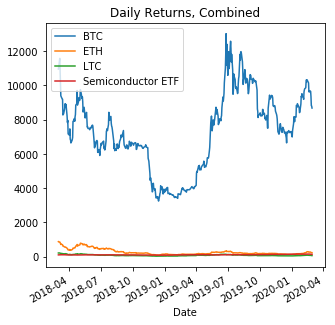

In [39]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(5,5),title='Daily Returns, Combined')

In [26]:
# Calculate cumulative returns of all portfolios
 # Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
# Display sample values
cumulative_returns.head()

,BTC,ETH,LTC,Semiconductor ETF
Date,,,,
2018-03-01,1.095200e+04,8.732000e+02,2.107500e+02,1.016427e+02
2018-03-02,1.214292e+08,7.490773e+05,4.500693e+04,1.049126e+04
2018-03-05,1.405458e+12,6.402244e+08,9.549345e+06,1.095264e+06
2018-03-06,1.515210e+16,5.236722e+11,1.886960e+09,1.160044e+08
2018-03-07,1.510145e+20,3.947603e+14,3.525577e+11,1.233890e+10


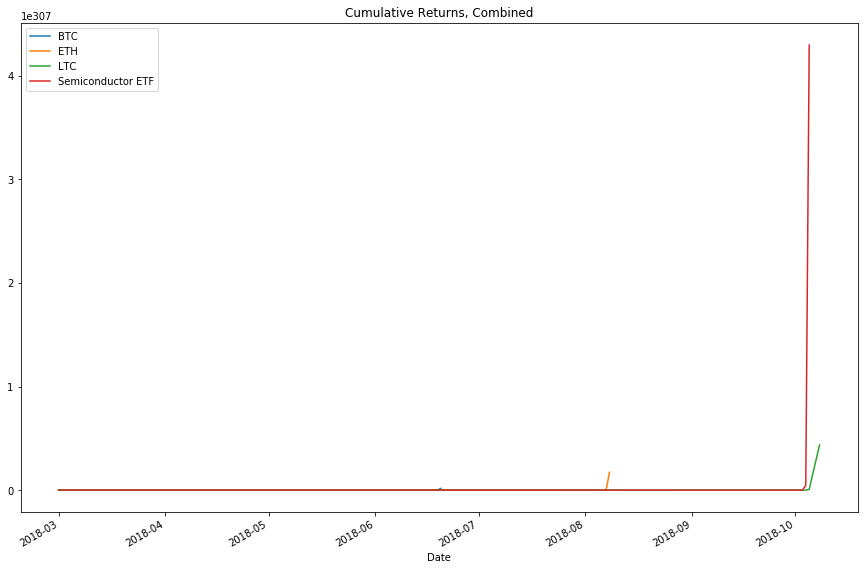

In [27]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10),title='Cumulative Returns, Combined')

In [28]:
#data collected from the World Health Organization
#https://covid19.who.int/info/
    
csv_path = Path("../Resources/WHO-COVID-19-global-data.csv")
df_covid_cases = pd.read_csv(csv_path)
df_covid_cases.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [29]:
# Check for null values df_covid_cases
df_covid_cases.isnull().sum()

Date_reported          0
Country_code         638
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [30]:
 # Cleaning nulls from DataFrame by dropping
df_covid_cases = df_covid_cases.dropna().copy()
df_covid_cases.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [31]:
df_covid_cases = df_covid_cases.drop(columns=['Country_code'])
df_covid_cases.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0


In [32]:
#Change date column name 
df_covid_cases = df_covid_cases.rename(columns={"Date_reported": "Date"})
df_covid_cases.head()

,Date,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0


In [33]:
#sort by date 

df_covid_cases = df_covid_cases.sort_values(by=["Date"], ascending=True)
df_covid_cases.head()

,Date,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
17226,2020-01-03,Botswana,AFRO,0,0,0,0
65714,2020-01-03,Italy,EURO,0,0,0,0
65076,2020-01-03,Israel,EURO,0,0,0,0
112926,2020-01-03,Saba,AMRO,0,0,0,0


In [34]:
#change index to date
df_covid_cases = df_covid_cases.set_index('Date')
df_covid_cases.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date,,,,,,
2020-01-03,Afghanistan,EMRO,0,0,0,0
2020-01-03,Botswana,AFRO,0,0,0,0
2020-01-03,Italy,EURO,0,0,0,0
2020-01-03,Israel,EURO,0,0,0,0
2020-01-03,Saba,AMRO,0,0,0,0


In [35]:
# slice for only date and new covid cases 
df_covid_cases = df_covid_cases.drop(columns=['WHO_region','Cumulative_cases','New_deaths','Cumulative_deaths'])
df_covid_cases.head()

,Country,New_cases
Date,,
2020-01-03,Afghanistan,0
2020-01-03,Botswana,0
2020-01-03,Italy,0
2020-01-03,Israel,0
2020-01-03,Saba,0


In [36]:
df_covid_cases.head()

,Country,New_cases
Date,,
2020-01-03,Afghanistan,0
2020-01-03,Botswana,0
2020-01-03,Italy,0
2020-01-03,Israel,0
2020-01-03,Saba,0


In [37]:
#set dates to match cryptocurrency and semiconductor dates 
df_covid_cases = df_covid_cases[(df_covid_cases.index > '2020-03-01') & (df_covid_cases.index <= '2021-03-01')]
df_covid_cases.head()

,Country,New_cases
Date,,
2020-03-02,Mexico,3
2020-03-02,Sierra Leone,0
2020-03-02,Malawi,0
2020-03-02,Latvia,1
2020-03-02,Czechia,3


In [38]:
# slice for only date and new covid cases 
df_covid_cases = df_covid_cases.drop(columns=['Country'])
df_covid_cases.head()

,New_cases
Date,
2020-03-02,3
2020-03-02,0
2020-03-02,0
2020-03-02,1
2020-03-02,3


In [46]:
combined_df.head()

,BTC,ETH,LTC,Semiconductor ETF
Date,,,,
2018-03-01,10951.000000,872.200012,209.750000,100.642700
2018-03-02,11086.400391,856.853027,212.556000,102.217041
2018-03-05,11573.299805,853.684021,211.175003,103.397797
2018-03-06,10779.900391,816.950989,196.600998,104.914551
2018-03-07,9965.570312,752.830994,185.839005,105.365730


In [49]:

# Create Parallel Coordinates plot
px.parallel_coordinates(combined_df)

In [ ]:
# Create scatter plot
px.scatter(combined_df, x="municipality", y="amount", color="filing_date")